# Naive Bayes Predicting survival from titanic crash

In [2]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [34]:
#creating the data frame and importing the titanic dataset.
df = pd.read_csv("titanic.csv")
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


# Basic Exploration

In [5]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df.size

10692

In [8]:
df.shape

(891, 12)

In [10]:
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [14]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [15]:
df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Data Cleaning

In [35]:
#check the dataset any missing values is their or not.
df.isnull()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [25]:
df.isnull().sum().sum()

866

In [37]:
#working on the dataset to add the median values in nan place in Age cloumn.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,28.0,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [38]:
df.tail() # you can see the medain value is placed at the nan place of the age cloumn inn 888 row.

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,28.0,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [39]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [40]:
# Dropping unnecessary cloumns to avoid the fitting problem of our model.
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


# Data Visulization

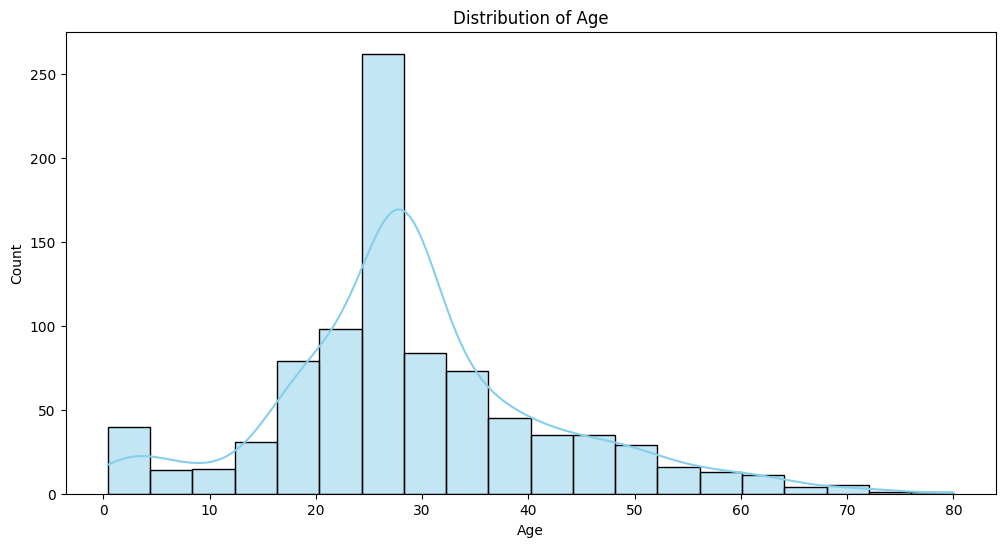

In [41]:
# Visualize distributions of Age and Fare
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

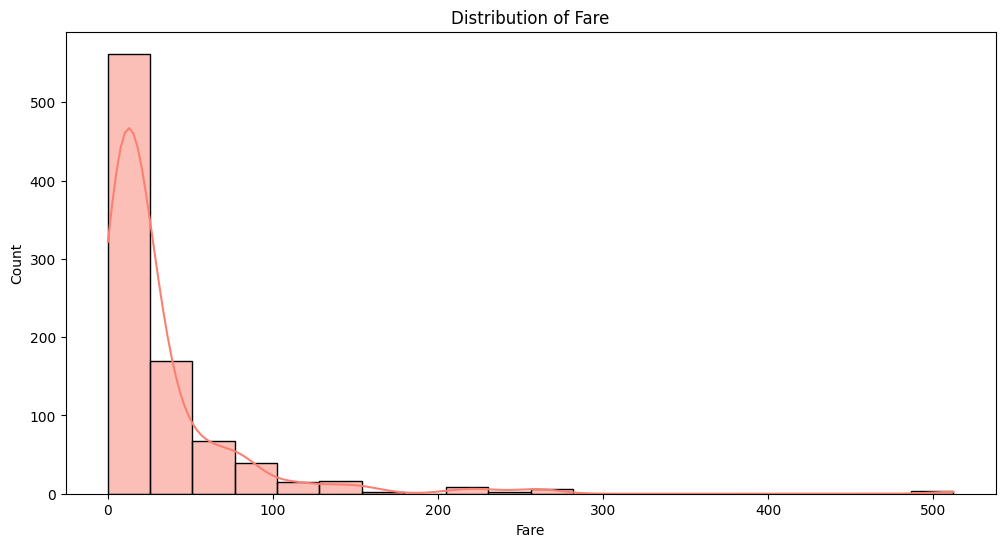

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [44]:
# Cross-tabulate Sex, Pclass, Embarked, and Survival
sex_tab = pd.crosstab(index=df['Sex'], columns='count')
pclass_tab = pd.crosstab(index=df['Pclass'], columns='count')
Age_tab = pd.crosstab(index=df['Age'], columns='count')
survival_tab = pd.crosstab(index=df['Survived'], columns='count')

sex_tab, pclass_tab, Age_tab, survival_tab

(col_0   count
 Sex          
 female    314
 male      577,
 col_0   count
 Pclass       
 1         216
 2         184
 3         491,
 col_0  count
 Age         
 0.42       1
 0.67       1
 0.75       2
 0.83       2
 0.92       1
 ...      ...
 70.00      2
 70.50      1
 71.00      2
 74.00      1
 80.00      1
 
 [88 rows x 1 columns],
 col_0     count
 Survived       
 0           549
 1           342)

In [51]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [52]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [53]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [54]:
#I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female.
inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


# Train and Test Splitting My Dataset

In [74]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [60]:
len(X_train)

712

In [61]:
len(X_test)

179

In [62]:
len(inputs)

891

# Model Selection

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [76]:
model.fit(X_train, y_train)

GaussianNB()

In [77]:
model.score(X_test,y_test) # The people survived in the titanic has the 77 percentage.

0.770949720670391

In [78]:
X_test[0:10]

,Pclass,Age,Fare,female,male
591,1,52.0,78.2667,1,0
87,3,28.0,8.0500,0,1
286,3,30.0,9.5000,0,1
606,3,30.0,7.8958,0,1
337,1,41.0,134.5000,1,0
139,1,24.0,79.2000,0,1
738,3,28.0,7.8958,0,1
7,3,2.0,21.0750,0,1
870,3,26.0,7.8958,0,1
191,2,19.0,13.0000,0,1


In [79]:
y_test[0:10]

C:\Users\venkata sai\AppData\Local\Temp\ipykernel_8364\2966258366.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[0:10]


591    1
87     0
286    1
606    0
337    1
139    0
738    0
7      0
870    0
191    0
Name: Survived, dtype: int64

In [80]:
model.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
model.predict_proba(X_test[:10])

array([[2.21058170e-03, 9.97789418e-01],
       [9.89429862e-01, 1.05701379e-02],
       [9.89785635e-01, 1.02143653e-02],
       [9.89719265e-01, 1.02807345e-02],
       [6.37910279e-05, 9.99936209e-01],
       [7.41801544e-01, 2.58198456e-01],
       [9.89422476e-01, 1.05775244e-02],
       [9.79188146e-01, 2.08118542e-02],
       [9.89079945e-01, 1.09200549e-02],
       [9.73716827e-01, 2.62831732e-02]])

# Calculate the score using cross validation


In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5) # The model Perfromed well in the scores of cross validation.

array([0.81118881, 0.8041958 , 0.76056338, 0.78169014, 0.76056338])